In [126]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import re
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sklearn.metrics

In [11]:
#load the geojson
file = gpd.read_file('../Downloads/GEOHACKPOINTS.geojson')
segments = gpd.read_file('../Downloads/GEOHACKsegments.geojson')

In [4]:
file.head()

,id,labels,landcover,lccode,geometry
0,0000c691f5aaf109c707,{'geometry': {'coordinates': [[[[-124.38616326...,rock,2,POINT (-124.3861479038261 43.33113690182093)
1,0000e784fbdcd9d8dc1b,{'geometry': {'coordinates': [[[-124.386163269...,marineveg,4,POINT (-124.3860881508459 43.33096022201427)
2,0000d173246ae7947a7e,{'geometry': {'coordinates': [[[-124.386282489...,rock,2,POINT (-124.3862605566047 43.33083253902136)
3,00000c6ab5903ee3409b,{'geometry': {'coordinates': [[[-124.386888818...,Water,1,POINT (-124.3868790381808 43.3306445561746)
4,0000bd23e67bc45c0271,{'geometry': {'coordinates': [[[[-124.38815094...,Water,1,POINT (-124.387447666492 43.32964560804837)


In [12]:
segments.head()

,id,count,label,geometry
0,+100+151,2,19,(POLYGON ((-124.3566093696548 43.3444129942027...
1,+100+152,2,21,(POLYGON ((-124.3565993451928 43.3439628932937...
2,+100+153,1,47,POLYGON ((-124.3572060293078 43.34350547463885...
3,+100+156,1,15,POLYGON ((-124.3571759443381 43.34215517191419...
4,+100+157,1,36,POLYGON ((-124.3571659164782 43.34170507093115...


In [84]:
df = pd.DataFrame(data={'seg':[], 'label':[]})
df.head()

,seg,label


In [87]:
#go throught a loop to extract the label and lccode
for i in range(file.shape[0]):
    myid = re.search('"id":(.*)"properties"', file.labels[i]).group(1).replace('"', '').replace(' ','').replace(',','')
    label = segments.loc[segments['id'] == myid]['label']
    df_small = pd.DataFrame(data = {'seg':label, 'label':file.lccode[i]})
    df = df.append(df_small)
    print(label)

1763    27
Name: label, dtype: int64
1738    32
Name: label, dtype: int64
1738    32
Name: label, dtype: int64
1702    5
Name: label, dtype: int64
1656    23
Name: label, dtype: int64
1705    11
Name: label, dtype: int64
1704    8
Name: label, dtype: int64
1739    45
Name: label, dtype: int64
1739    45
Name: label, dtype: int64
1739    45
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1739    45
Name: label, dtype: int64
1738    32
Name: label, dtype: int64
1738    32
Name: label, dtype: int64
1738    32
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1831    14
Name: label, dtype: int64
1823    36
Name: label, dtype: int64
1789    36
Name: label, dtype: int64
1762    18
Name: label, dtype: int64
1737    8
Name: label, dtype: int64
1736    19
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1763    27
Name: label, dtype: int64
1761    42
Name: label, dtype: int64
1761

Name: label, dtype: int64
832    49
Name: label, dtype: int64
976    10
Name: label, dtype: int64
976    10
Name: label, dtype: int64
866    38
Name: label, dtype: int64
866    38
Name: label, dtype: int64
866    38
Name: label, dtype: int64
897    49
Name: label, dtype: int64
867    31
Name: label, dtype: int64
833    27
Name: label, dtype: int64
866    38
Name: label, dtype: int64
760    15
Name: label, dtype: int64
798    31
Name: label, dtype: int64
798    31
Name: label, dtype: int64
760    15
Name: label, dtype: int64
727    45
Name: label, dtype: int64
900    49
Name: label, dtype: int64
900    49
Name: label, dtype: int64
762    18
Name: label, dtype: int64
900    49
Name: label, dtype: int64
834    2
Name: label, dtype: int64
900    49
Name: label, dtype: int64
867    31
Name: label, dtype: int64
867    31
Name: label, dtype: int64
899    38
Name: label, dtype: int64
900    49
Name: label, dtype: int64
900    49
Name: label, dtype: int64
900    49
Name: label, dtype: int64
836

1637    40
Name: label, dtype: int64
1637    40
Name: label, dtype: int64
1581    22
Name: label, dtype: int64
1526    37
Name: label, dtype: int64
1484    43
Name: label, dtype: int64
1395    23
Name: label, dtype: int64
1527    19
Name: label, dtype: int64
1485    16
Name: label, dtype: int64
1396    44
Name: label, dtype: int64
1394    13
Name: label, dtype: int64
1530    16
Name: label, dtype: int64
1361    5
Name: label, dtype: int64
1445    16
Name: label, dtype: int64
1445    16
Name: label, dtype: int64
1362    10
Name: label, dtype: int64
1363    5
Name: label, dtype: int64
1403    16
Name: label, dtype: int64
1590    40
Name: label, dtype: int64
1585    35
Name: label, dtype: int64
1531    22
Name: label, dtype: int64
1585    35
Name: label, dtype: int64
1585    35
Name: label, dtype: int64
1585    35
Name: label, dtype: int64
1690    15
Name: label, dtype: int64
1758    24
Name: label, dtype: int64
1690    15
Name: label, dtype: int64
1690    15
Name: label, dtype: int64
169

1439    44
Name: label, dtype: int64
1439    44
Name: label, dtype: int64
1522    19
Name: label, dtype: int64
1575    16
Name: label, dtype: int64
1632    19
Name: label, dtype: int64
1727    11
Name: label, dtype: int64
1777    40
Name: label, dtype: int64
1754    35
Name: label, dtype: int64
1572    19
Name: label, dtype: int64
1754    35
Name: label, dtype: int64
1777    40
Name: label, dtype: int64
1753    22
Name: label, dtype: int64
1754    35
Name: label, dtype: int64
1777    40
Name: label, dtype: int64
1777    40
Name: label, dtype: int64
1836    15
Name: label, dtype: int64
1836    15
Name: label, dtype: int64
1836    15
Name: label, dtype: int64
1812    26
Name: label, dtype: int64
1796    36
Name: label, dtype: int64
1796    36
Name: label, dtype: int64
1797    40
Name: label, dtype: int64
1797    40
Name: label, dtype: int64
1797    40
Name: label, dtype: int64
1752    16
Name: label, dtype: int64
1775    35
Name: label, dtype: int64
1796    36
Name: label, dtype: int64
1

Name: label, dtype: int64
2161    42
Name: label, dtype: int64
2160    35
Name: label, dtype: int64
2160    35
Name: label, dtype: int64
2174    34
Name: label, dtype: int64
2160    35
Name: label, dtype: int64
2167    18
Name: label, dtype: int64
2166    42
Name: label, dtype: int64
2159    43
Name: label, dtype: int64
2133    20
Name: label, dtype: int64
2152    47
Name: label, dtype: int64
2158    28
Name: label, dtype: int64
2171    20
Name: label, dtype: int64
2157    20
Name: label, dtype: int64
2170    34
Name: label, dtype: int64
2176    49
Name: label, dtype: int64
2182    28
Name: label, dtype: int64
2176    49
Name: label, dtype: int64
2182    28
Name: label, dtype: int64
2175    18
Name: label, dtype: int64
2175    18
Name: label, dtype: int64
2175    18
Name: label, dtype: int64
2169    29
Name: label, dtype: int64
2104    29
Name: label, dtype: int64
2036    34
Name: label, dtype: int64
2066    13
Name: label, dtype: int64
2104    29
Name: label, dtype: int64
2104    29
N

Name: label, dtype: int64
530    4
Name: label, dtype: int64
489    26
Name: label, dtype: int64
390    9
Name: label, dtype: int64
390    9
Name: label, dtype: int64
397    21
Name: label, dtype: int64
398    35
Name: label, dtype: int64
393    20
Name: label, dtype: int64
458    4
Name: label, dtype: int64
458    4
Name: label, dtype: int64
458    4
Name: label, dtype: int64
458    4
Name: label, dtype: int64
458    4
Name: label, dtype: int64
436    12
Name: label, dtype: int64
435    47
Name: label, dtype: int64
434    42
Name: label, dtype: int64
423    3
Name: label, dtype: int64
425    11
Name: label, dtype: int64
413    42
Name: label, dtype: int64
410    16
Name: label, dtype: int64
390    9
Name: label, dtype: int64
454    20
Name: label, dtype: int64
453    21
Name: label, dtype: int64
390    9
Name: label, dtype: int64
390    9
Name: label, dtype: int64
470    37
Name: label, dtype: int64
472    48
Name: label, dtype: int64
458    4
Name: label, dtype: int64
496    36
Name:

In [30]:
file.labels[1]

'[ { "geometry": { "coordinates": [ [ [ -124.38653116669407, 43.33099772878832 ], [ -124.38651068547453, 43.33009753608804 ], [ -124.38589412036241, 43.33010500996466 ], [ -124.38591459248129, 43.33100520289864 ], [ -124.38653116669407, 43.33099772878832 ] ] ], "geodesic": false, "type": "Polygon" }, "id": "+52+181", "properties": { "count": 2, "label": 0.0 }, "type": "Feature" } ]'

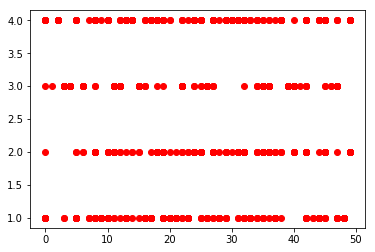

In [95]:
# visualize the distribution
plt.plot(df.seg, df.label, 'ro')

Text(0.5,1,'training distribution')

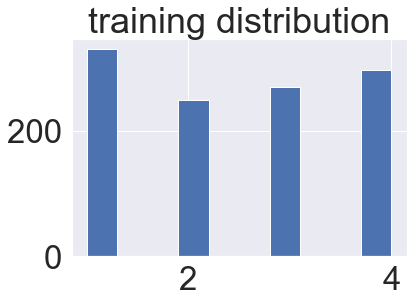

In [134]:
#divide 80-20 % of data
df_train, df_test = train_test_split(df,test_size=0.2, random_state=40)
df_train.shape
df_train.head()
#plot histogram of train
plt.hist(df_train.label)
plt.title('training distribution')

Text(0.5,1,'testing distribution')

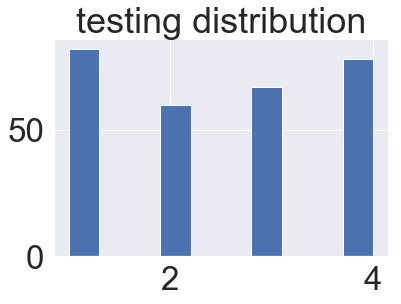

In [136]:
#test data
plt.hist(df_test.label)
plt.title('testing distribution')

In [135]:
#find the unique values in training set, making sure that we can train all the segments
seg_unique = df_train.seg.unique()
print(seg_unique)
len(seg_unique)


[32 14 18 26 41 31  3  5  8 33 15 16 20 40 24  9 23 19 22 42 28 11  4 17
 36 44  6 10 39 45 12 47 35 38 25  0 49 27 37 13 21 29 48 30 34 43 46  2
  7  1]


50

In [204]:
#use training data to find the distribution

#create a dictionary to hold values
seg_dict = {}
confidence_dict = {}

for seg_id in seg_unique:
    label_list = []
    #find all the values, and find the majority of label
    for i in range(df_train.shape[0]):
        if df_train.seg.iloc[i] == seg_id:
            label_list.append(df_train.label.iloc[i])
            
    #find the majority
    label_pred = max(label_list,key=label_list.count)
    seg_dict[seg_id] = label_pred
    confidence_dict[seg_id] = label_list.count(label_pred)/len(label_list)
print('segment - label lookup dictionary')
print(seg_dict)
print('confidence dictionary')
print(confidence_dict)

segment - label lookup dictionary
{32: 4, 14: 4, 18: 2, 26: 3, 41: 3, 31: 2, 3: 3, 5: 1, 8: 2, 33: 1, 15: 3, 16: 1, 20: 1, 40: 3, 24: 4, 9: 1, 23: 1, 19: 2, 22: 3, 42: 2, 28: 1, 11: 3, 4: 3, 17: 1, 36: 3, 44: 1, 6: 3, 10: 1, 39: 3, 45: 2, 12: 3, 47: 3, 35: 3, 38: 4, 25: 2, 0: 1, 49: 4, 27: 4, 37: 1, 13: 1, 21: 1, 29: 4, 48: 1, 30: 4, 34: 4, 43: 1, 46: 3, 2: 4, 7: 1, 1: 3}
confidence dictionary
{32: 0.5757575757575758, 14: 0.8333333333333334, 18: 0.5588235294117647, 26: 0.75, 41: 1.0, 31: 0.47058823529411764, 3: 0.9166666666666666, 5: 0.8055555555555556, 8: 0.6481481481481481, 33: 0.8, 15: 0.9, 16: 0.6666666666666666, 20: 0.9, 40: 0.851063829787234, 24: 0.72, 9: 1.0, 23: 0.9333333333333333, 19: 0.5, 22: 0.76, 42: 0.49019607843137253, 28: 0.7777777777777778, 11: 0.5384615384615384, 4: 1.0, 17: 0.8958333333333334, 36: 0.5517241379310345, 44: 0.8378378378378378, 6: 0.7142857142857143, 10: 0.4230769230769231, 39: 1.0, 45: 0.5652173913043478, 12: 0.8148148148148148, 47: 0.5, 35: 0.75, 38: 0.

Text(0,0.5,'confidence score')

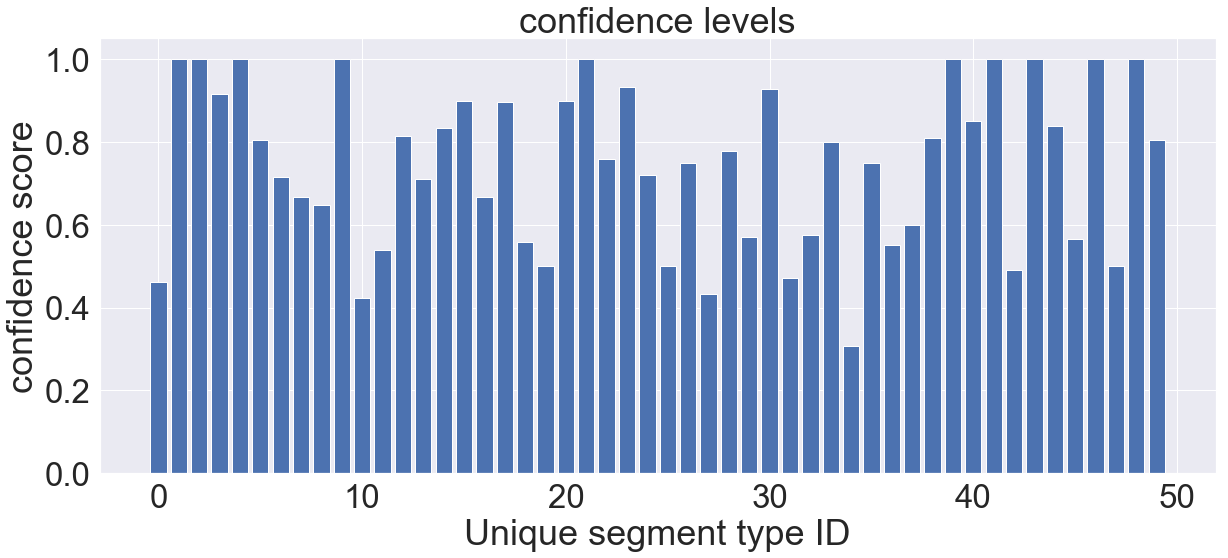

In [199]:
#print confidence levels of each segment type
lists = sorted(confidence_dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists)
fig = plt.figure(figsize =(20,8))
plt.bar(x,y)
plt.title('confidence levels')
plt.xlabel('Unique segment type ID')
plt.ylabel('confidence score')


In [165]:
#run on the entire dataset

#first create a new column for df_train
df['label_pred'] = np.random.randn(df.shape[0])
df_test['label_pred'] = np.random.randn(df_test.shape[0])


#predict on the entire dataset, and then predict on just the test set
for i in range(df.shape[0]):
    seg_id = df.seg.iloc[i]
    label_pred = seg_dict[seg_id]
    df['label_pred'].iloc[i] = label_pred 

df.astype('int32')
df.head()


/anaconda2/envs/rasterenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/envs/rasterenv/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,seg,label,label_pred
1763,27,2,4.0
1738,32,4,4.0
1738,32,2,4.0
1702,5,1,1.0
1656,23,1,1.0


In [166]:
#predict on the  test set
for i in range(df_test.shape[0]):
    seg_id = df_test.seg.iloc[i]
    label_pred = seg_dict[seg_id]
    df_test['label_pred'].iloc[i] = label_pred 

df_test.astype('int32')
df_test.head()

/anaconda2/envs/rasterenv/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/anaconda2/envs/rasterenv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,seg,label,label_pred
1283,10,1,1.0
2027,45,2,2.0
296,48,1,1.0
239,48,1,1.0
1637,40,3,3.0


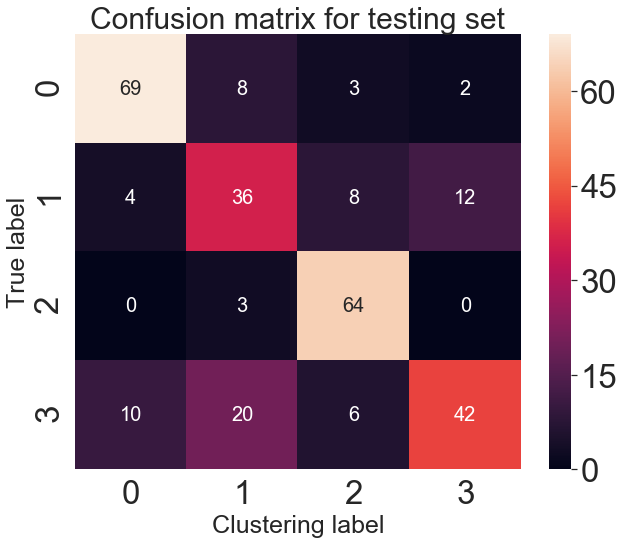

In [170]:
#plot the confusion metrics now
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(df_test.label, df_test.label_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix for testing set", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()

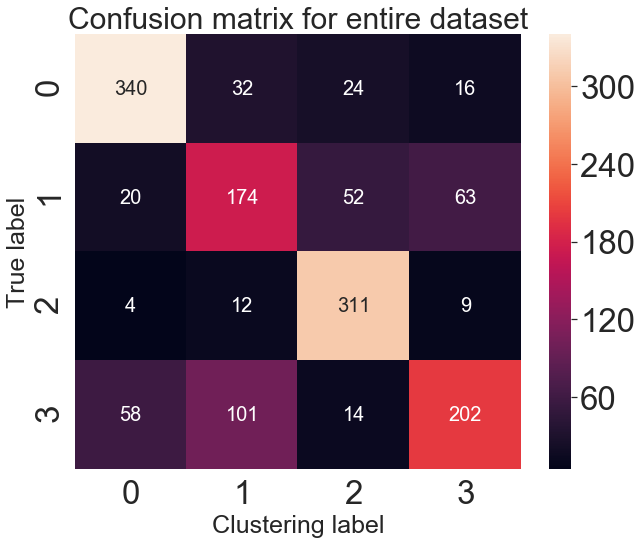

In [201]:
#plot the confusion metrics now for entire dataset
sns.set(font_scale=3)
confusion_matrix = sklearn.metrics.confusion_matrix(df.label, df.label_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt="d", annot_kws={"size": 20});
plt.title("Confusion matrix for entire dataset", fontsize=30)
plt.ylabel('True label', fontsize=25)
plt.xlabel('Clustering label', fontsize=25)
plt.show()
#water, rock, unsolidated, mariane veg

In [179]:
print(confusion_matrix)
#accuracy for each class:
f1_score_test = sklearn.metrics.f1_score(df_test.label, df_test.label_pred, average='weighted')
print('f1 score for testing set is ' + str(f1_score_test))
f1_score = sklearn.metrics.f1_score(df.label, df.label_pred, average='weighted')
print('f1 score for entire set is ' + str(f1_score))

[[340  32  24  16]
 [ 20 174  52  63]
 [  4  12 311   9]
 [ 58 101  14 202]]
f1 score for testing set is 0.729752733614355
f1 score for entire set is 0.7112732851686725
